# Titanic 

In [70]:
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()
import warnings
warnings.filterwarnings("ignore") 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score,recall_score,f1_score,accuracy_score

In [2]:
# read data 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
print("*" * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

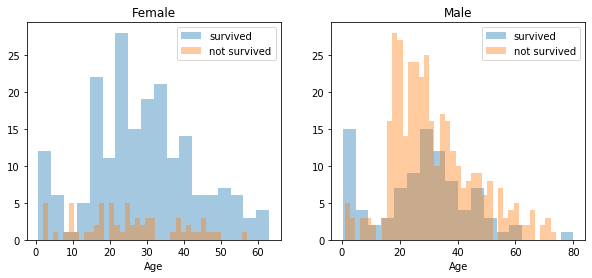

In [9]:
survived = "survived"
not_survived = "not survived"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train[train.Sex == "female"] 
men = train[train.Sex == "male"] 

ax = sns.distplot(women[women.Survived==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women.Survived==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title("Female")

ax = sns.distplot(men[men.Survived==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sns.distplot(men[men.Survived==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
_ = ax.set_title("Male")


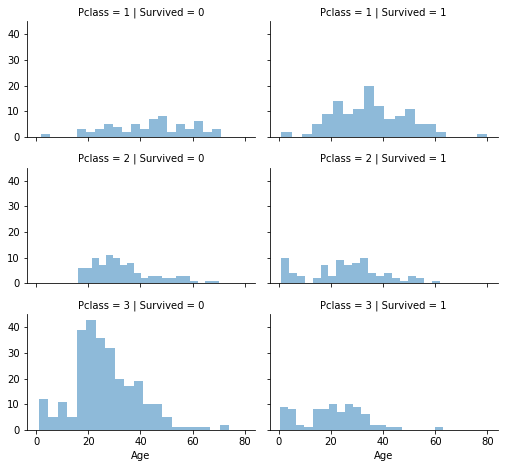

In [12]:
grid = sns.FacetGrid(train, col="Survived", row="Pclass", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()

In [13]:
# preprocessing 
train = train.drop(["PassengerId"], axis=1)
test = test.drop(["PassengerId"], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train.describe(include=["int64"])

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [14]:
train.describe(include=["int64"])

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594
std,257.353842,0.486592,0.836071,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000


In [16]:
train.isnull().sum() # isna() is exactly same functionality with isnull(), in numpy, using isnan()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# percentage of y/n survived
survived = train[train.Survived == 1]
not_survived = train[train.Survived == 0]
print (f"Survived: {len(survived)} ({float(len(survived))/len(train)*100.0}%)")
print (f"Not Survived: {len(not_survived)} ({float(len(not_survived))/len(train)*100.0}%)")
print (f"Total: len(train)")

Survived: 342 (38.38383838383838%)
Not Survived: 549 (61.61616161616161%)
Total: len(train)


## Find the relations beteween the features and survival

1. Pclass & Survival


In [24]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
pclass_survived = train.groupby("Pclass").Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

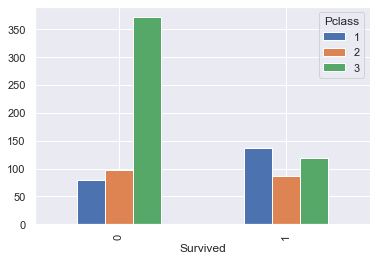

In [31]:
pclass_survived.unstack(level=0).plot(kind="bar", subplots=False)

apparently, higher class has better chance to survive.

below, we can calculate the percentages of survival by class

In [33]:
pclass_survived_average = train[["Pclass", "Survived"]].groupby("Pclass", as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


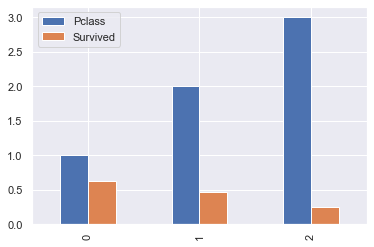

In [34]:
pclass_survived_average.plot(kind="bar", subplots=False)

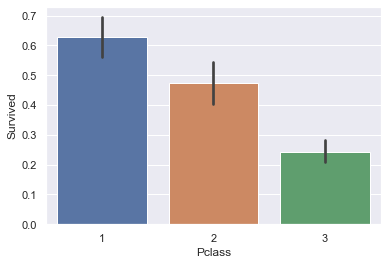

In [35]:
sns.barplot(x="Pclass", y="Survived", data=train)

2. Sex & Survival

In [36]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
sex_survival = train.groupby("Sex").Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

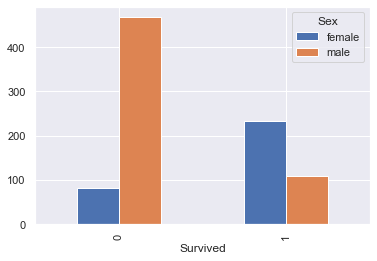

In [38]:
sex_survival.unstack(level=0).plot(kind="bar", subplots=False)

In [39]:
sex_survived_average = train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean()
sex_survived_average

,Sex,Survived
0,female,0.742038
1,male,0.188908


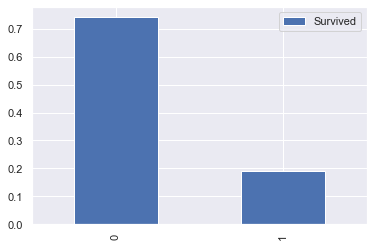

In [40]:
sex_survived_average.plot(kind="bar", subplots=False)

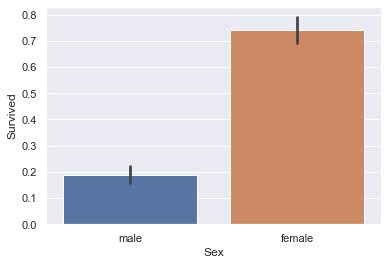

In [41]:
sns.barplot(x="Sex", y="Survived", data=train)

naturally, females have better survival chance 

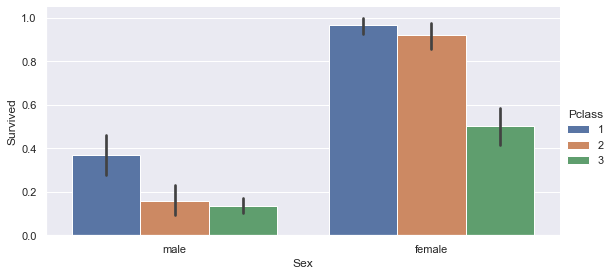

In [46]:
sns.factorplot(x="Sex", y="Survived", hue="Pclass", size=4, aspect=2, kind="bar", data=train)

4. Pclass, Sex & Embarked vs. Survival

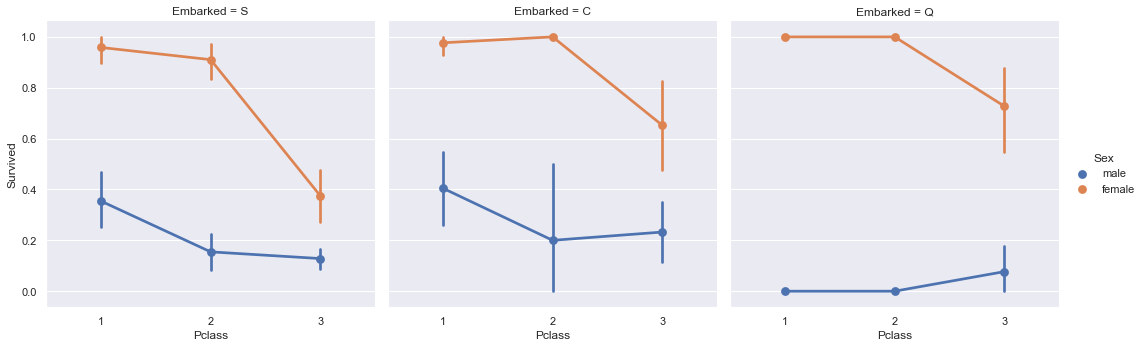

In [47]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked", data=train)

there are 3 thing should be noticed:

1. most females from 1st and 2ed class survived.
2. died women from 3rd class.
3. men from 1st class have almost same chance to survived with 2ed.

5. Embarked & Survival

In [48]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
train.groupby("Embarked").Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [50]:
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


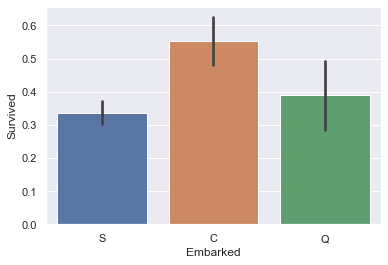

In [51]:
sns.barplot(x="Embarked", y="Survived", data=train)

6. Parch vs. Survival

In [52]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [53]:
train.groupby("Parch").Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

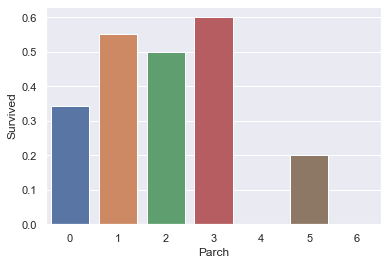

In [54]:
sns.barplot(x="Parch", y="Survived", ci=None, data=train) 
# ci: Size of confidence intervals to draw around estimated values. If “sd”, skip bootstrapping and draw the standard deviation of the observations. If None, no bootstrapping will be performed, and error bars will not be drawn. 

7. SibSp vs. Survival

In [55]:
print(train.SibSp.value_counts())
print("_" * 50)
print(train.groupby("SibSp").Survived.value_counts())
print("_" * 50)
print(train[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
__________________________________________________
SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64
__________________________________________________
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


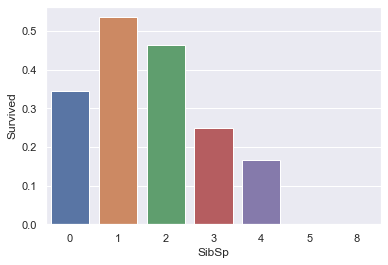

In [56]:
sns.barplot(x="SibSp", y="Survived", ci=None, data=train)

8. Age vs. Survival

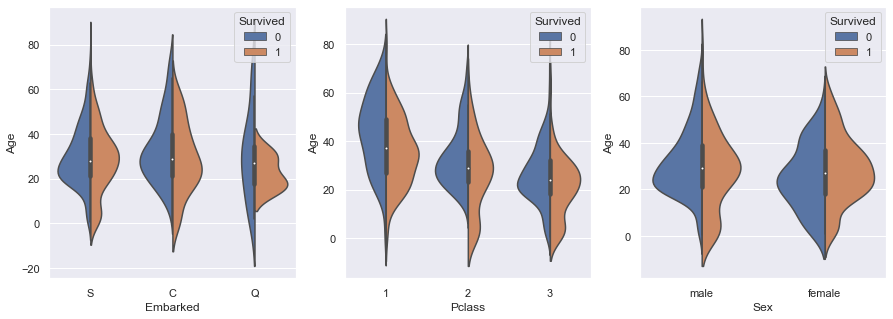

In [57]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

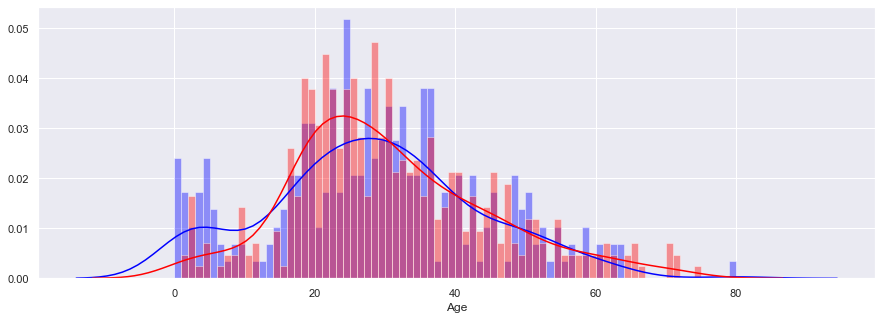

In [58]:
total_survived = train[train.Survived == 1]
total_not_survived = train[train.Survived == 0]

male_survived = train[(train.Survived == 1) & (train.Sex == "male")]
female_survived = train[(train.Survived ==1) & (train.Sex == "female")]

male_not_survived = train[(train.Survived == 0) & (train.Sex =="male")]
female_not_survived = train[(train.Survived == 0) & (train.Sex =="female")]

plt.figure(figsize=[15, 5])
plt.subplot(111)
sns.distplot(total_survived.Age.dropna().values, bins=range(0, 81, 1), kde=True, color="blue")
sns.distplot(total_not_survived.Age.dropna().values, bins=range(0, 81, 1), kde=True, color="red", axlabel="Age")

## Correlating Features

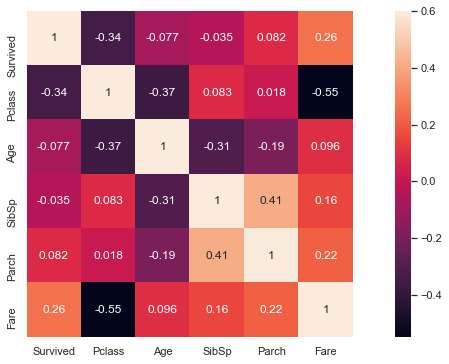

In [60]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop("PassengerId", axis=1).corr(), vmax=0.6, square=True, annot=True)

## Feature Extraction

In [61]:
# extracting title: Mr. Miss ...
train_test_data = [train, test]
for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(' ([A-Za-z]+)\.')

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [63]:
pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [64]:
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess","Capt", "Col", \
 	"Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Other")

    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
train[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


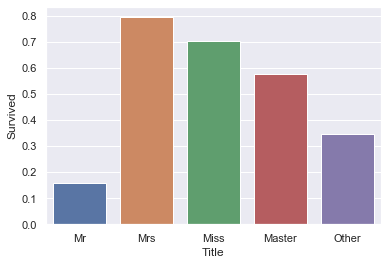

In [65]:
sns.barplot(x="Title", y="Survived", ci=None, data=train)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [68]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
              ..
A26            1
E34            1
C50            1
B30            1
A36            1
Name: Cabin, Length: 147, dtype: int64

In [67]:
# different attributes 
quantitives = ["Age", "SibSp", "Parch", "Fare"]
bi_col = ["Sex"]
labels_col = ["Sex", "Embarked", "Title", "Pclass"]
# drop the columns are not important for the prediction
to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]

In [71]:
quanti_refiner = Pipeline(
    steps=[
        ("imputation",SimpleImputer(strategy="median")),
        ("scale",StandardScaler())                              
    ]
)
bi_col_refiner = Pipeline(
    steps=[
        ("imputation",SimpleImputer(strategy="most_frequent")),
        ("onehot_encoder",OneHotEncoder(drop="first", categories="auto"))                
    ]
)

labels_col_refiner = Pipeline(
    steps=[
        ("imputation",SimpleImputer(strategy="most_frequent")),
        ("label_encoder",OrdinalEncoder())                
    ]
)

preprocessed = ColumnTransformer(
    remainder = "passthrough",
    transformers = [
        ("quanti_refined", quanti_refiner, quantitives),
        ("bi_col_refined", bi_col_refiner, bi_col),
        ("labels_col_refined", labels_col_refiner, labels_col),
        ("dropped", "drop", to_drop)
    ]
)

In [82]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.copy()

X_train.shape, y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

In [83]:
# Classification

# KNN
knn_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("KNN", KNeighborsClassifier())                
    ]
)
hyper_params = {
    "KNN__n_neighbors": [2,3,4,5],
    "KNN__p": [2,3,4],
    "KNN__weights":["uniform","distance"]
}

In [84]:
# using grid serach for find the best parameters 
optimal_knn = GridSearchCV(knn_pipeline, hyper_params, cv=5)

In [85]:

# fit the data 
optimal_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('processing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputation',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [86]:
optimal_knn.best_params_

{'KNN__n_neighbors': 5, 'KNN__p': 2, 'KNN__weights': 'uniform'}

In [87]:
# score on training set
optimal_knn.score(X_train, y_train)

0.8686868686868687

In [88]:
y_pred_knn = optimal_knn.predict(X_test)

In [89]:
optimal_knn2 = GridSearchCV(knn_pipeline, hyper_params, cv=5, scoring="recall")
optimal_knn2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('processing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputation',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [90]:
optimal_knn2.best_params_

{'KNN__n_neighbors': 5, 'KNN__p': 2, 'KNN__weights': 'uniform'}

In [91]:
svm_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("LSVC", LinearSVC())                
    ]
)
svc_hyper_params = {
    "LSVC__C": [1,10,100,10000,100000]
}

optimal_svm = GridSearchCV(svm_pipeline, svc_hyper_params, cv=5, scoring="recall")
optimal_svm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('processing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputation',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [92]:
print(f"Best parameters: {optimal_svm.best_params_}")
print(f"Training set score: {optimal_svm.score(X_train, y_train)}")

Best parameters: {'LSVC__C': 1}
Training set score: 0.695906432748538


In [93]:
# LDA
lda_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("LDA", LinearDiscriminantAnalysis())              
    ]
)
lda_hyper_params = {
    "LDA__solver": ["svd","lsqr","eigen"]
}
optimal_lda = GridSearchCV(lda_pipeline, lda_hyper_params, cv=5, scoring="recall")
optimal_lda.fit(X_train,y_train)
print(f"Best parameters: {optimal_lda.best_params_}")
print(f"Training set score: {optimal_lda.score(X_train, y_train)}")

Best parameters: {'LDA__solver': 'svd'}
Training set score: 0.695906432748538


In [94]:
tree_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("decisiontree", DecisionTreeClassifier(random_state=0))
    ]
)
tree_hyper_params = {
    "decisiontree__criterion": ['gini', 'entropy'],
    "decisiontree__max_depth": [1,5,10],
    "decisiontree__min_samples_split": range(2,3),
    "decisiontree__min_samples_leaf": range(1,3)
}
optimal_tree = GridSearchCV(tree_pipeline, tree_hyper_params, cv=5, scoring="recall")
optimal_tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('processing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputation',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [95]:
print(f"Best parameters: {optimal_tree.best_params_}")
print(f"Training set score: {optimal_tree.score(X_train, y_train)}")

Best parameters: {'decisiontree__criterion': 'gini', 'decisiontree__max_depth': 5, 'decisiontree__min_samples_leaf': 1, 'decisiontree__min_samples_split': 2}
Training set score: 0.7543859649122807


In [97]:
lr_pipeline = Pipeline(
    steps=[
        ("processing", preprocessed),
        ("lr",  LogisticRegression())
    ]
)
lr_hyper_params = {
    "lr__penalty" : ["l1", "l2"],
    "lr__C": np.logspace(-4, 4, 20),
}
optimal_lr = GridSearchCV(lr_pipeline, lr_hyper_params, cv=5, scoring="recall")
optimal_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('processing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('quanti_refined',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputation',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [98]:
print(f"Best parameters: {optimal_lr.best_params_}")
print(f"Training set score: {optimal_lr.score(X_train, y_train)}")

Best parameters: {'lr__C': 1.623776739188721, 'lr__penalty': 'l2'}
Training set score: 0.6900584795321637


In [99]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_knn
    })
submission.to_csv('gender_submission.csv', index=False)